# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [1]:
import xlwings as xw
from xlwings.constants import AutoFillType
import numpy as np
import pandas as pd
wb = xw.Book('себестоимостьА_в1.xlsx')
rec = wb.sheets['Рецептура']
cons = rec.range('G7:O10').options(np.array).value
cons = np.nan_to_num(cons)
unit_prices = rec.range('G14:O14').value
const = np.sum(cons * unit_prices, axis = 1)

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [2]:
rec.range('T6').value = 'Себестоимость'
rec.range('T7').options(transpose=True).value = const

In [4]:
rec.range('T7:T10').value

[21.48, 16.525, 17.423000000000002, 18.085]

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [1]:
import csv
import pandas as pd
df_rev = pd.read_csv('reviews_sample.csv').rename({'Unnamed: 0':'id'},axis = 1)
df_rec = pd.read_csv('recipes_sample.csv', usecols = ['id','name','minutes','submitted','description','n_ingredients'])
df_rev.head()

,id,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [2]:
df_rec.head()

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [3]:
rec_1 = df_rec.sample(int(df_rec.shape[0]*0.05))
rev_1 = df_rev.sample(int(df_rev.shape[0]*0.05))
writer = pd.ExcelWriter('recipes.xlsx', engine = 'xlsxwriter')
rec_1.to_excel(writer, sheet_name="Рецепты", index=True)
rev_1.to_excel(writer, sheet_name="Отзывы", index=True)
writer.close()
xlsx_1 = pd.read_excel('recipes.xlsx', index_col=0,sheet_name=["Рецепты", "Отзывы"])
xlsx_1['Рецепты'].head()

,name,id,minutes,submitted,description,n_ingredients
16141,light rock cakes,181761,30,2006-08-14,the best way to describe rock cakes are as an ...,NaN
15390,kiss keeping it super simple fried fish,271399,20,2007-12-12,"beer, fish, pancake batter - that's all you ne...",3.0
22514,rice and lentil soup or stew,118957,115,2005-04-25,"this thick, hearty soup is started with the tr...",NaN
24760,soma sengupta passover recipes carciofi alla ...,530888,35,2017-03-27,carciofi alla giudia!!! pure bliss is sitting ...,NaN
6840,chocolaty caramel pecan bars,91986,40,2004-05-27,i make these cookies every year for christmas....,7.0


In [4]:
xlsx_1['Отзывы'].head()

,id,user_id,recipe_id,date,rating,review
49034,180123,87870,75588,2006-04-09,5,EXCELLENT!!! The only thing I had to do differ...
58499,1030619,998226,107356,2010-03-15,5,"Fantastic,\nMy guest loved it! This will beco..."
39033,656042,41480,27208,2002-09-24,5,I have to give credit where it is due!!! I won...
109016,16936,1553277,501641,2014-07-18,5,I tried this recipe with chicken and port cutl...
114534,584979,4470,98305,2004-09-20,5,Easy put on and forget it recipe that produce...


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [44]:
import xlwings as xw
import numpy as np
xw_1 = xw.Book('recipes.xlsx')
sht_rec = xw_1.sheets['Рецепты']
sec = pd.DataFrame(xlsx_1['Рецепты']['minutes']*60).rename({'minutes':'seconds_assign'},axis = 1)
xw.Range('H1:H1501').options(index = False).value= sec
xw.Range('H1:H1501').value[:50]

['seconds_assign',
 1800.0,
 1200.0,
 6900.0,
 2100.0,
 2400.0,
 1800.0,
 7800.0,
 3300.0,
 41400.0,
 0.0,
 2100.0,
 2400.0,
 2700.0,
 2400.0,
 1800.0,
 6300.0,
 1200.0,
 4200.0,
 300.0,
 3000.0,
 1200.0,
 1500.0,
 3360.0,
 1320.0,
 1320.0,
 36300.0,
 600.0,
 3000.0,
 3300.0,
 900.0,
 180.0,
 300.0,
 1200.0,
 2400.0,
 2100.0,
 6000.0,
 3300.0,
 2400.0,
 6900.0,
 900.0,
 4800.0,
 2100.0,
 1800.0,
 1980.0,
 300.0,
 1200.0,
 3300.0,
 1500.0,
 1800.0]

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [45]:
xw.Range('I1').value = 'seconds_formula'
fml = xw.Range('I2').formula = '=(D2*60)'
xw.Range("I2:I1501").formula = fml
xw.Range('I1:I1501').value[:50]

['seconds_formula',
 1800.0,
 1200.0,
 6900.0,
 2100.0,
 2400.0,
 1800.0,
 7800.0,
 3300.0,
 41400.0,
 0.0,
 2100.0,
 2400.0,
 2700.0,
 2400.0,
 1800.0,
 6300.0,
 1200.0,
 4200.0,
 300.0,
 3000.0,
 1200.0,
 1500.0,
 3360.0,
 1320.0,
 1320.0,
 36300.0,
 600.0,
 3000.0,
 3300.0,
 900.0,
 180.0,
 300.0,
 1200.0,
 2400.0,
 2100.0,
 6000.0,
 3300.0,
 2400.0,
 6900.0,
 900.0,
 4800.0,
 2100.0,
 1800.0,
 1980.0,
 300.0,
 1200.0,
 3300.0,
 1500.0,
 1800.0]

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [46]:
xw.Range('H1').font.bold = True
xw.Range('H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
xw.Range('I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
xw.Range('I1').font.bold = True
xw_1.save()

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [47]:
red = (255,153,153)
green = (153,255,153)
yellow = (255,255,153)
j = 2
for i in xw.Range("D2:D1501").value:
    if i < 5:
        xw.Range('D'+str(j)).color = green
    elif i >= 5 and i <= 10:
        xw.Range('D'+str(j)).color = yellow
    elif i > 10:
        xw.Range('D'+str(j)).color  = red
    j+=1

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [49]:
sht_rec.range('J1').value = 'n_reviews'
fml = xw.Range('J2').formula = '=COUNTIF(Отзывы!D2;C2)'
sht_rec.range('J2:J1501').formula = fml

com_error: (-2147352567, 'Ошибка.', (0, None, None, None, 0, -2146827284), None)

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [48]:
sht_rev = xw_1.sheets['Отзывы']
def validate(rec):
    sht_rec = xw_1.sheets['Рецепты']
    sht_rev = xw_1.sheets['Отзывы']
    count = 2
    for j in rec:
        if int(j) in [i for i in range(6)]:
            if sht_rev.range('D'+str(count)).value in sht_rec.range('C2 : C1501').value:
                pass
            else:
                sht_rev.range('A'+str(count)+':'+'G'+str(count)).color = red
        else:
            sht_rev.range('A'+str(count)+':'+'G'+str(count)).color = red
        count+=1
validate(sht_rev.range('F2:F6335').value)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [95]:
with open('recipes_model.csv',encoding = 'utf-8') as f:
    a = csv.reader(f,delimiter='\t')
    b = np.array(list(a))
xw_2 = xw.Book('recipes_model.xlsx')
xw.Range('A1:J18').clear()
xw.Range('Модель!A2').value = b

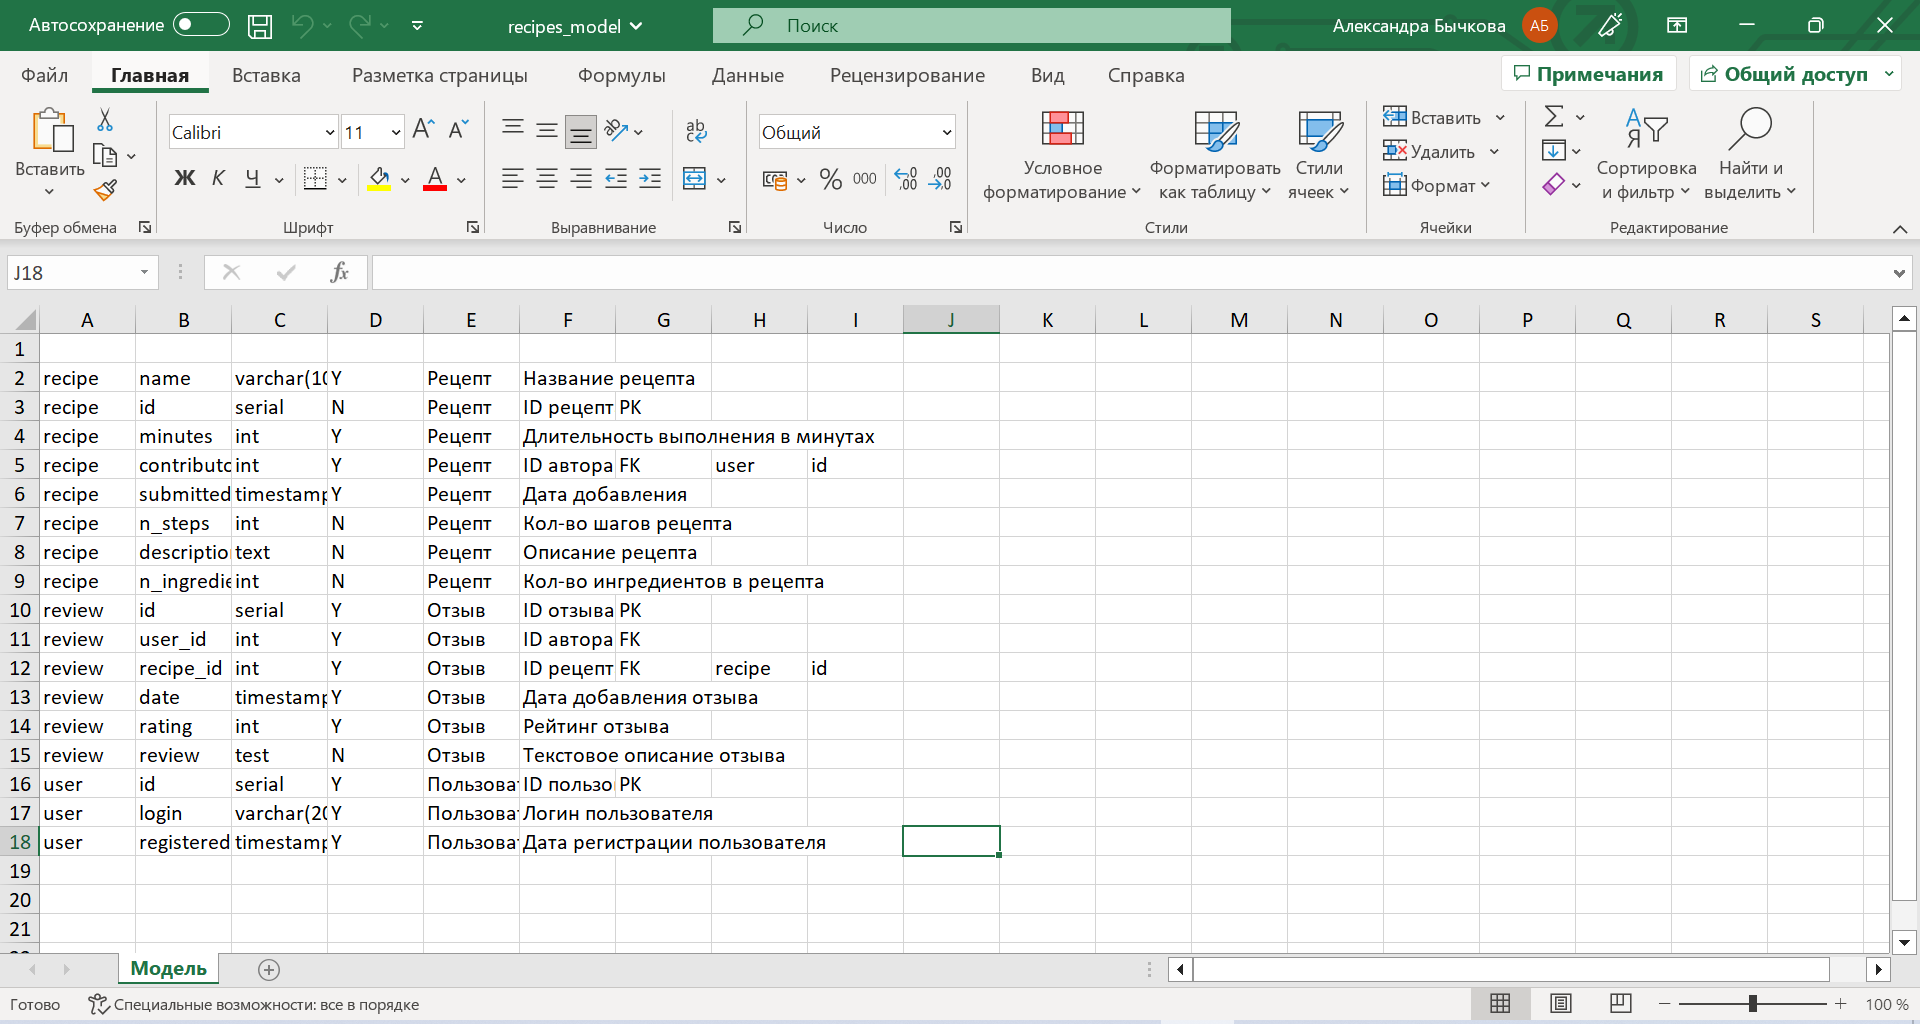

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [102]:
from xlwings.ext.sql import sql


OperationalError: near "=": syntax error

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [103]:
xw.Range('A2:J2').color = ('00ccff')

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 